In [1]:
# Acceder a los datos directamente desde la BD (Se requieren claves de acceso)

# Librerías para el análisis y visualización
import pandas as pd
import matplotlib.pyplot as plt

# Librerías necesarias para acceder a los datos
import boto3
import os
from dotenv import load_dotenv

import json

load_dotenv()

# Usar las claves almacenadas en las variables de entorno para acceder a la base de datos DynamoDB
os.environ['AWS_ACCESS_KEY_ID'] = os.getenv('AWS_ACCESS_KEY_ID') 
os.environ['AWS_SECRET_ACCESS_KEY'] = os.getenv('AWS_SECRET_ACCESS_KEY') 
dynamodb = boto3.resource('dynamodb', region_name='us-east-1')

# Obtener la referencia de la tabla existente
table = dynamodb.Table('StudentsCartagenaU')

# Escanear todos los ítems de la tabla
response = table.scan()

# Obtener la lista de ítems
items = response.get('Items', {})

# Pasar los items a un DataFrame
df = pd.DataFrame(items)

In [2]:
# Mostrar forma de la tabla
df.head(1)

,experience,lastNames,summary,student,geoCountryName,birthDate,industryName,locationName,userName,geoLocationName,certifications,firstNames,education,languages,public_id,headline,skills
0,[{'timePeriod': {'endDate': {'month': Decimal(...,Román Misas,,False,Colombia,{},Computer Software,Colombia,frigodev,"Cartagena, Bolívar",[],Alejandro,[{'timePeriod': {'endDate': {'year': Decimal('...,[],frigodev,Systems Engineering Student - Software Developer,"[{'name': 'Inglés'}, {'name': 'Comunicación'},..."


In [3]:
# Formato del diccionario de la columna experiencia
df['experience'][0]

[{'timePeriod': {'endDate': {'month': Decimal('4'), 'year': Decimal('2023')},
   'startDate': {'month': Decimal('2'), 'year': Decimal('2023')}},
  'company': {'companyName': 'Applaudo',
   'industries': ['Information Technology and Services']},
  'position': 'React Trainee'}]

In [4]:
# Función para mostrar la experiencia del estudiante
def experiencia(i):

      if len(items[i].get('experience', [])) == 0:
            print('Sin experiencia laboral')
      
      else:
            for xp in range (len(items[i].get('experience', []))):
                  print('-'*50)
                  
                  print('Nombre de la empresa:',items[i].get('experience', [])[xp].get('company', {}).get('companyName', ''))

                  print('Fecha de inicio: ', items[i].get('experience', [])[xp].get('timePeriod', {}).get('startDate', {}).get('month'),
                        '/', items[i].get('experience', [])[xp].get('timePeriod', {}).get('startDate', {}).get('year'), sep='')
                  
                  if items[i].get('experience', [])[xp].get('timePeriod', {}).get('endDate', {}).get('year') == None:
                        print('Tabajando actualmente')
                  else:
                        print('Fecha de fin: ', items[i].get('experience', [])[xp].get('timePeriod', {}).get('endDate', {}).get('month'),
                              '/', items[i].get('experience', [])[xp].get('timePeriod', {}).get('endDate', {}).get('year'), sep='')

                  print('Nombre del cargo:',items[i].get('experience', [])[xp].get('position', ''))

In [5]:
# Mostrar Nombre y experiencia de los estudiantes

for i in range (len(items)):
    print('_'*50)
    print('Nombre del estudiante:', items[i].get('firstNames'), items[i].get('lastNames'))
    print('Nombre de usuario en LinkedIn:', items[i].get('userName'))
    experiencia(i)
print('_'*50)

__________________________________________________
Nombre del estudiante: Alejandro Román Misas
Nombre de usuario en LinkedIn: frigodev
--------------------------------------------------
Nombre de la empresa: Applaudo
Fecha de inicio: 2/2023
Fecha de fin: 4/2023
Nombre del cargo: React Trainee
__________________________________________________
Nombre del estudiante: Santiago Andrés
Nombre de usuario en LinkedIn: santiago-andrés-473269238
Sin experiencia laboral
__________________________________________________
Nombre del estudiante: Jair Enrique Acosta Aguilar
Nombre de usuario en LinkedIn: jair-enrique-acosta-aguilar-273628258
Sin experiencia laboral
__________________________________________________
Nombre del estudiante: Fabián Montes Fernández
Nombre de usuario en LinkedIn: fmontesf
--------------------------------------------------
Nombre de la empresa: PRAGMA
Fecha de inicio: 9/2023
Tabajando actualmente
Nombre del cargo: Desarrollador Java Senior
-------------------------------

In [6]:
# Buscar por apellido
for i in range (len(items)):
    if 'Olivares' in items[i].get('lastNames'):
        print('_'*50)
        print('Nombre del estudiante:', items[i].get('firstNames'), items[i].get('lastNames'))
        print('Nombre de usuario en LinkedIn:', items[i].get('userName'))
        experiencia(i)
print('_'*50)

__________________________________________________
Nombre del estudiante: Luis Olivares
Nombre de usuario en LinkedIn: None
--------------------------------------------------
Nombre de la empresa: Applying Consulting
Fecha de inicio: 10/2023
Tabajando actualmente
Nombre del cargo: Frontend Developer
__________________________________________________


In [7]:
# Listas de elementos por cada experiencia laboral individual o estudiante sin experiencia laboral

nombre_estudiante = []
nombre_usuario = []
nombre_empresa = []
fecha_inicio = []
fecha_fin = []
cargo = []

for i in range (len(items)):
    # Agregar elementos por cada experiencia laboral de todos los estudiantes o por estudiantes sin expeeriencia laboral
    if len(items[i].get('experience', [])) == 0: # Si no tiene experiencia laboral
            nombre_estudiante.append(f'{items[i].get('firstNames')} {items[i].get('lastNames')}')
            nombre_usuario.append(items[i].get('userName'))
            nombre_empresa.append('Sin experiencia')
            fecha_inicio.append('Sin experiencia')
            fecha_fin.append('Sin experiencia')
            cargo.append('Sin experiencia')
    else:
        for xp in range (len(items[i].get('experience', []))): # Si tiene experiencia laboral
            nombre_estudiante.append(f'{items[i].get('firstNames')} {items[i].get('lastNames')}') # estudiante
            nombre_usuario.append(items[i].get('userName')) # usuario
            nombre_empresa.append(items[i].get('experience', [])[xp].get('company', {}).get('companyName', '')) # Empresa
            cargo.append(items[i].get('experience', [])[xp].get('position', '')) # Cargo

            # Fecha de inicio
            fecha_inicio.append(f'{items[i].get('experience', [])[xp].get('timePeriod', {}).get('startDate', {}).get('month')}/{items[i].get('experience', [])[xp].get('timePeriod', {}).get('startDate', {}).get('year')}')
            # Fecha de fin
            if items[i].get('experience', [])[xp].get('timePeriod', {}).get('endDate', {}).get('year') == None:
                fecha_fin.append('Tabajando actualmente')
            else:
                fecha_fin.append(f'{items[i].get('experience', [])[xp].get('timePeriod', {}).get('endDate', {}).get('month')} / {items[i].get('experience', [])[xp].get('timePeriod', {}).get('endDate', {}).get('year')}')

In [8]:
# Se crea el DataFrame con las listas

df_experiencias = pd.DataFrame()

df_experiencias['Usuario de LinkedIn'] = nombre_usuario
df_experiencias['Estudiante'] = nombre_estudiante
df_experiencias['Empresa'] = nombre_empresa
df_experiencias['Cargo'] = cargo
df_experiencias['Fecha de inicio'] = fecha_inicio
df_experiencias['Fecha de fin'] = fecha_fin

In [9]:
# Exportar DataFrame de experiencias laborales individuales

df_experiencias.to_excel('Datos-experiencias-laborales.xlsx', index=False)

# Exportar json de las empresas encontradas
empresas_dict = {"Empresas": list(set((df_experiencias['Empresa'][(df_experiencias['Empresa'] != 'Sin experiencia') & (df_experiencias['Empresa'].str.contains('Freelance') == False) & (df_experiencias['Empresa'] != '')])))}

with open('empresas.json', 'w') as json_file:
    json.dump(empresas_dict, json_file, ensure_ascii=False, indent=4)

In [10]:
# Estructura del Dataframe creado con los datos más relevantes

df_experiencias.head(5)

,Usuario de LinkedIn,Estudiante,Empresa,Cargo,Fecha de inicio,Fecha de fin
0,frigodev,Alejandro Román Misas,Applaudo,React Trainee,2/2023,4 / 2023
1,santiago-andrés-473269238,Santiago Andrés,Sin experiencia,Sin experiencia,Sin experiencia,Sin experiencia
2,jair-enrique-acosta-aguilar-273628258,Jair Enrique Acosta Aguilar,Sin experiencia,Sin experiencia,Sin experiencia,Sin experiencia
3,fmontesf,Fabián Montes Fernández,PRAGMA,Desarrollador Java Senior,9/2023,Tabajando actualmente
4,fmontesf,Fabián Montes Fernández,PRAGMA,Desarrollador Java,3/2022,9 / 2023


In [11]:
print("Total perfiles extraidos:",len(items))
print("Total empresas encontradas:",len(df_experiencias['Empresa'][(~df_experiencias['Empresa'].str.contains('Freelance')) & (df_experiencias['Empresa'] != '') & (df_experiencias['Empresa'] != 'Sin experiencia')].value_counts()))
print("Total estudiantes sin experiencia laboral:", len(df_experiencias['Empresa'][df_experiencias['Empresa'] == 'Sin experiencia']))

Total perfiles extraidos: 102
Total empresas encontradas: 220
Total estudiantes sin experiencia laboral: 10


In [12]:
# Estudiantes que han trabajado como Freelance

df_experiencias[df_experiencias['Empresa'].str.contains('Freelance')]

,Usuario de LinkedIn,Estudiante,Empresa,Cargo,Fecha de inicio,Fecha de fin
189,david-enrique-castillo-castro-18a405163,David Enrique Castillo Castro,Freelance | Self-Employed,Freelance,None/2021,Tabajando actualmente
220,jjaramilloh,Jorge Alveiro J.,Freelance,Desarrollador de software,11/2023,4 / 2024
285,javierllns,Javier Antonio Llanos Marriaga,Freelance (Self employed),Desarrollador freelance (vtex plugin):,11/2021,10 / 2022
288,ronaldbr,Ronald Borja,Freelance (Self employed),Backend Developer,3/2024,Tabajando actualmente


In [13]:
# Estudiantes trabajando actualmente en un puesto

#Exportar la lista de empresas

# current_employers = df_experiencias['Empresa'][df_experiencias['Fecha de fin'] == "Tabajando actualmente"].value_counts()

# # Exportar los nombres de las empresas a un archivo de texto
# with open('empresas_trabajando_actualmente.txt', 'w') as file:
#     for empresa, count in current_employers.items():
#         file.write(f"{empresa} ({count})\n")

df_experiencias[df_experiencias['Fecha de fin'] == "Tabajando actualmente"].head(5)

,Usuario de LinkedIn,Estudiante,Empresa,Cargo,Fecha de inicio,Fecha de fin
3,fmontesf,Fabián Montes Fernández,PRAGMA,Desarrollador Java Senior,9/2023,Tabajando actualmente
16,auryac96,Aury Stella Alvarez,Novaromas S.A,Ingeniera de aplicaciones,4/2022,Tabajando actualmente
20,hermanoswaldodiazluna,Herman Oswaldo Diaz Luna,Sofka Technologies,Consultor de desarrollo,2/2024,Tabajando actualmente
23,nineth-de-arco-orozco-a39315119,Nineth De Arco Orozco,CALZACOSTA LTDA,Auxiliar de sistemas,8/2022,Tabajando actualmente
28,oordosgoitia,ORNELA PATRICIA ORDOSGOITIA MARRUGO,Keralty,Health Analysis and Optimization Unit Physician,5/2022,Tabajando actualmente


In [14]:
# Cargos en los que han trabajado los estudiantes

#Exportar la lista de cargos

cargos = df_experiencias['Cargo'].value_counts()

# Exportar los nombres de los cargos a un archivo de texto
with open('cargos.txt', 'w') as file:
    for cargo, count in cargos.items():
        file.write(f"{cargo} ({count})\n")

df_experiencias['Cargo'].value_counts().reset_index()

,Cargo,count
0,Ingeniero de sistemas,11
1,Sin experiencia,10
2,Desarrollador de software,9
3,Desarrollador de front-end,5
4,Ingeniero de software,5
...,...,...
219,Catedrático universitario,1
220,Ingeniero Desarrollador Backend Java (Microser...,1
221,Instructor Academia Oracle,1
222,Mision TIC 2022,1


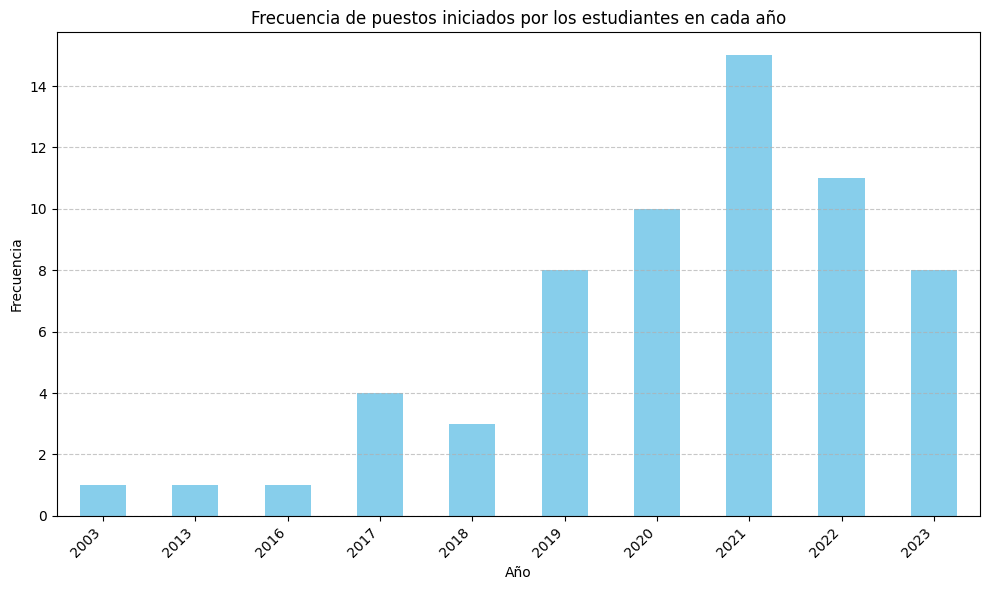

In [15]:
# Frecuencia en los años donde los estudiantes han iniciado en los cargos

# Crear un nuevo DataFrame solo para las fechas
df_fechas = df_experiencias[df_experiencias['Fecha de inicio'] != 'Sin experiencia'].copy()

# Eliminar filas con valores inesperados en 'Fecha de inicio'
df_fechas = df_fechas[df_fechas['Fecha de inicio'].str.match(r'\d{2}/\d{4}')]

# Convertir las fechas de inicio a formato de fecha y hora
df_fechas['Fecha de inicio'] = pd.to_datetime(df_fechas['Fecha de inicio'], format='%m/%Y')

# Contar la frecuencia de fechas por año
yearly_counts = df_fechas['Fecha de inicio'].dt.year.value_counts()

# Ordenar los años de menor a mayor
yearly_counts = yearly_counts.sort_index()

# Graficar los años con mayor frecuencia
plt.figure(figsize=(10, 6))
yearly_counts.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de puestos iniciados por los estudiantes en cada año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

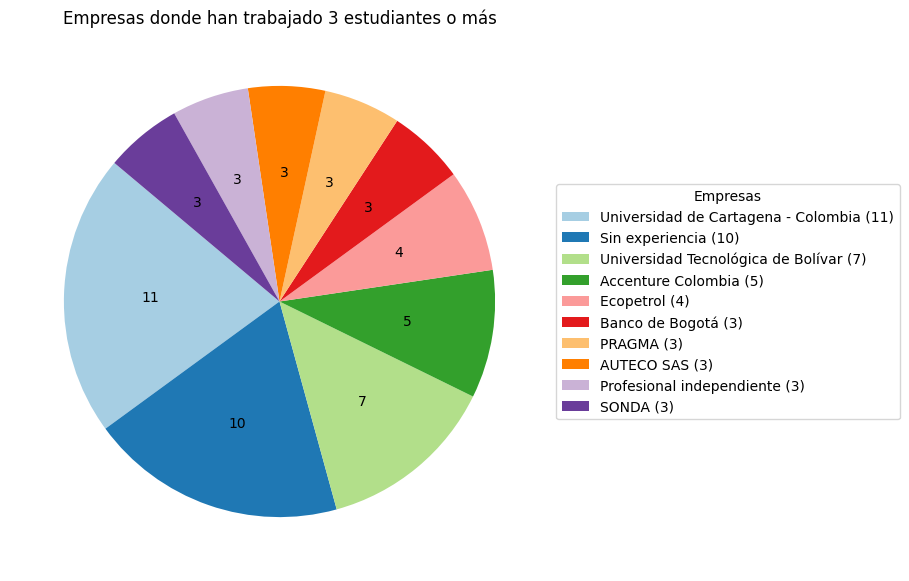

In [16]:
# Gráfica de pastel de empresas con más de 2 estudiantes

# Contar los valores de la columna 'Empresa'
value_counts = df_experiencias['Empresa'].value_counts()

# Seleccionar las empresas con 2 estudiantes o más
top_counts = value_counts[value_counts >= 3]

# Crear el gráfico de pastel
plt.figure(figsize=(10, 7))

# Función para mostrar solo el número de veces que aparece cada valor
def autopct_func(pct):
    total = sum(top_counts)
    val = int(round(pct*total/100.0))
    return f'{val:d}'

# Crear el gráfico de pastel
wedges, _, autotexts = plt.pie(
    top_counts, 
    autopct=autopct_func, 
    colors=plt.cm.Paired(range(len(top_counts))),
    startangle=140
)

# Agregar título
plt.title('Empresas donde han trabajado 3 estudiantes o más')

# Crear la leyenda con nombres y frecuencias
labels = [f'{company} ({count})' for company, count in top_counts.items()]
plt.legend(wedges, labels, title="Empresas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mostrar el gráfico
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.show()

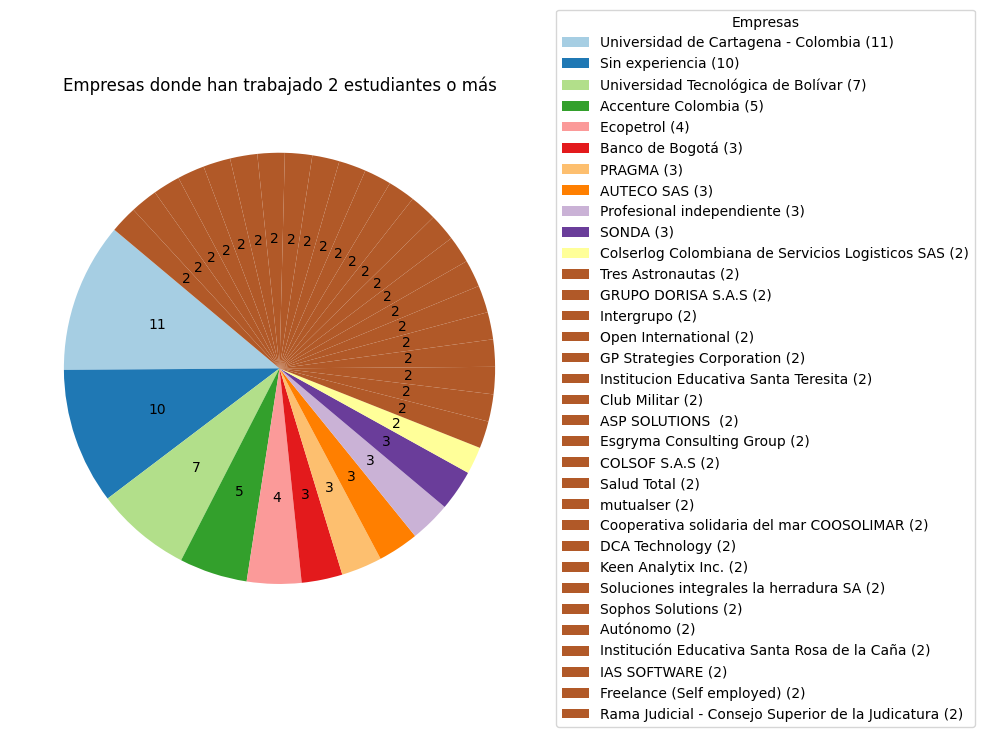

In [17]:
# Gráfica de pastel de empresas con 2 estudientes o más 

# Contar los valores de la columna 'Empresa'
value_counts = df_experiencias['Empresa'].value_counts()

# Seleccionar las empresas con 2 estudiantes o más
top_counts = value_counts[value_counts >= 2]

# Crear el gráfico de pastel
plt.figure(figsize=(10, 7))

# Función para mostrar solo el número de veces que aparece cada valor
def autopct_func(pct):
    total = sum(top_counts)
    val = int(round(pct*total/100.0))
    return f'{val:d}'

# Crear el gráfico de pastel
wedges, _, autotexts = plt.pie(
    top_counts, 
    autopct=autopct_func, 
    colors=plt.cm.Paired(range(len(top_counts))),
    startangle=140
)

# Agregar título
plt.title('Empresas donde han trabajado 2 estudiantes o más')

# Crear la leyenda con nombres y frecuencias
labels = [f'{company} ({count})' for company, count in top_counts.items()]
plt.legend(wedges, labels, title="Empresas", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mostrar el gráfico
plt.ylabel('')  # Ocultar la etiqueta del eje y
plt.show()


In [18]:
# Exportar lista empresas con 2 estudiantes o más

# Contar los valores de la columna 'Empresa'
value_counts = df_experiencias['Empresa'].value_counts()

# Filtrar las empresas con frecuencia igual o mayor a dos
multiple_counts = value_counts[value_counts >= 2]

# Exportar los nombres de las empresas a un archivo de texto
with open('empresas_frecuencia_multiples.txt', 'w') as file:
    for empresa, count in multiple_counts.items():
        file.write(f"{empresa} ({count})\n")

In [19]:
# Exportar lista empresas con 1 estudiante

# Contar los valores de la columna 'Empresa'
value_counts = df_experiencias['Empresa'].value_counts()

# Filtrar las empresas con frecuencia igual a uno
single_counts = value_counts[value_counts == 1]

# Exportar los nombres de las empresas a un archivo de texto
with open('empresas_frecuencia_uno.txt', 'w') as file:
    for empresa in single_counts.index:
        file.write(f"{empresa}\n")